In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
electronics_json_data = [json.loads(line) for line in (open("D:/4th_SEMESTER/5._DMT/J-Comp/Electronics_5.json","r"))]

In [3]:
electronics_data = pd.DataFrame(electronics_json_data)

In [4]:
electronics_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
electronics_data["overall"].value_counts()

5.0    1009026
4.0     347041
3.0     142257
1.0     108725
2.0      82139
Name: overall, dtype: int64

_Here according to data description :_

* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

In [6]:
electronics_data.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [7]:
electronics_data.shape

(1689188, 9)

*_Dataset is very large, so we'll take only first 100k values for our Project*_

In [8]:
electronics_data = electronics_data[0:100000]

In [9]:
electronics_data.shape

(100000, 9)

# Data Wrangling:

* Data wrangling is the _process of cleaning and unifying messy and complex data sets_ for easy access and analysis. With the amount of data and data sources rapidly growing and expanding, it is getting increasingly essential for large amounts of available data to be organized for analysis.

In [10]:
# *Helpful* column is in matrix form, so it is better to seperate it into two column

list_helpful_rev = []
list_not_helpful_rev = []

for x in electronics_data['helpful']:
    list_helpful_rev.append(x[0])
    list_not_helpful_rev.append(x[1]-x[0])
    
# Adding *helpful* review column, review that customers find useful
electronics_data["helpful_rev"] = list_helpful_rev

# Adding *not_helpful* review column, review that customers find useless
electronics_data["not_helpful_rev"] = list_not_helpful_rev

#dropping helpful column
electronics_data = electronics_data.drop("helpful", axis = 1)

In [11]:
electronics_data.head(5)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",0,0
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",12,3
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",43,2
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",9,1
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",0,0


### Adding rating_class Column:

In [12]:
# Now, overall rating has 5 unique values (1,2,3,4,5)
# Lets classifyit as good rating and BAd Rating

threshold = 3

electronics_data["rating_class"] = electronics_data["overall"].apply(lambda x: "good" if x > 3 else "bad")

In [13]:
electronics_data.sample(10)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev,rating_class
39170,A2ULPJ9UDZCGQ2,B00006BA2C,"Amazon Customer ""tech writer and web developer""",I installed one of these for a client using Op...,5.0,Lots of bang for the buck,1063065600,"09 9, 2003",6,2,good
11441,A3OK2FQOF03N20,B00004WCID,Terri,I bought this device for long shutter speed sh...,5.0,wired remote trigger,1342828800,"07 21, 2012",0,0,good
51212,A28B1DZ3CLMCYI,B00007EDZG,Raz,I've only used this about ten times in the las...,4.0,simple and efficient,1390694400,"01 26, 2014",0,0,good
988,A8IMDXXLZVN5M,9983891212,"ThaCooLoser ""CooLoserTech""",Needed it so I can watch my recordings on the ...,5.0,Great for my digital cameras,1387152000,"12 16, 2013",0,0,good
40583,A3CMO216CWOF5N,B00006HOLO,jr_Tech,My Wife has used one of these for several year...,3.0,Decent AM/FM/TV/Wx Radio,1148342400,"05 23, 2006",5,1,bad
77817,A3O5ASFUXC32UA,B0000BZL1P,Marx Lives,"Like anyone else, I bought this filter to prot...",5.0,Perfect!,1362528000,"03 6, 2013",0,0,good
35759,A39A42ZHXY53VK,B000068O48,P. Schommer,I plugged this into my Galaxy Note II and the ...,2.0,Not a tight fit,1359158400,"01 26, 2013",0,0,bad
34951,A205CVP06GX7Y0,B000068NZN,H. Huddleston,Holy Crap... this is thick cable. I haven't h...,5.0,Stout Cable,1325116800,"12 29, 2011",0,0,good
75224,A11XMYVZO0JLC0,B0000AOWWY,G. Diaz,A month ago my first wireless keyboard/mouse c...,4.0,Close but no cigar,1104192000,"12 28, 2004",8,4,good
93488,A1ERIV3Q7T0GG4,B0001MQUOC,Monroe E.,They had a 10 year shelf-life when I received ...,5.0,As described,1359936000,"02 4, 2013",0,0,good


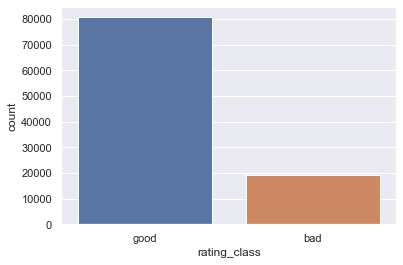

good    80692
bad     19308
Name: rating_class, dtype: int64


In [14]:
# Calculating the total number of good and Bad rating:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
sns.countplot(x = "rating_class", data=electronics_data)
plt.show()

val = electronics_data["rating_class"].value_counts()
print(val)

In [15]:
print("{:.2f}% more percentage of good rev than bad reviews.".format( ((val[0]-val[1]) / (val[1]+val[0])) * 100 ))

61.38% more percentage of good rev than bad reviews.


#### Adding helpful review ratio for each user

In [16]:
##adding col helpful_rev_ratio
electronics_data["helpful_rev_ratio"] = electronics_data["helpful_rev"] / (electronics_data["helpful_rev"] + electronics_data["not_helpful_rev"])

In [17]:
electronics_data.sample(2)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
97126,A3SCWXXJXBVJ05,B00020S7XK,Matthew,I got this radio for working out in the yard. ...,4.0,Good little radio...,1377907200,"08 31, 2013",0,0,good,NaN
65418,A36HDODRFZPTXB,B00009R6VZ,Karl - Tiny Thought Guy,"Having tried several ""after-market"" versions o...",5.0,A necessity for anyone wanting to do long expo...,1381622400,"10 13, 2013",1,0,good,1.0


In [18]:
electronics_data['helpful_rev_ratio'].fillna(0, inplace=True)

In [20]:
electronics_data.head(2)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",0,0,good,0.0
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",12,3,bad,0.8


*The fillna() method replaces the NULL values with a specified value*

In [21]:
#dropping columns reviewerName, unixReviewTime
electronics_data = electronics_data.drop(["reviewerName", "unixReviewTime"], axis = 1)

In [22]:
electronics_data.head(2)

,reviewerID,asin,reviewText,overall,summary,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
0,AO94DHGC771SJ,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"06 2, 2013",0,0,good,0.0
1,AMO214LNFCEI4,0528881469,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,"11 25, 2010",12,3,bad,0.8


In [23]:
# Renaming column 'Overall' to 'Ratings' as per our convenience

electronics_data = electronics_data.rename(columns = {"overall":"rating"})

In [24]:
electronics_data[["helpful_rev", "not_helpful_rev", "rating", "helpful_rev_ratio"]].describe()

,helpful_rev,not_helpful_rev,rating,helpful_rev_ratio
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.741470,0.752350,4.231190,0.424903
std,23.275162,3.144506,1.187011,0.460308
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,5.000000,0.000000
75%,3.000000,0.000000,5.000000,1.000000
max,1977.000000,227.000000,5.000000,1.000000


###### The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

In [30]:
#Converting time in yyyy-mm-dd

electronics_data["reviewTime"] = pd.to_datetime(electronics_data["reviewTime"])

In [31]:
electronics_data.sample(2)

,reviewerID,asin,reviewText,rating,summary,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio
13918,A17ZAVJP17IPAY,B00004Z78V,It installed perfectly and easyAnd has been wo...,5.0,Perfect Fit,2014-04-05,0,0,good,0.0
22699,AMUPNH4W41DK7,B00005N6KG,These have nice bass compared to the more expe...,4.0,Good headphones,2014-02-18,0,0,good,0.0


# Visualizing Data:

#### Number of Reviews over the Year:

In [32]:
# Creating Additional coloumn of month and year of review

electronics_data['rev_year'] = electronics_data['reviewTime'].dt.year
electronics_data['rev_month'] = electronics_data['reviewTime'].dt.month

In [34]:
# Grouping review w.r.t. year and taking count of reviewID

Yearly = electronics_data.groupby("rev_year")["reviewerID"].count().reset_index()
Yearly = Yearly.rename(columns = {'reviewerID':'Number_of_Reviews'})

In [38]:
Yearly

,rev_year,Number_of_Reviews
0,1999,72
1,2000,817
2,2001,1609
3,2002,2315
4,2003,3546
5,2004,4506
6,2005,4537
7,2006,4406
8,2007,6889
9,2008,6431


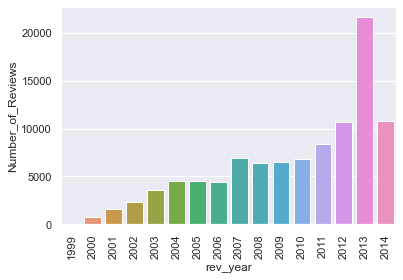

In [37]:
ax = sns.barplot(x = "rev_year", y = "Number_of_Reviews", data = Yearly)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

##### Here, we can clearly see that year 2013 has the maximum reviews.

In [39]:
Monthly = electronics_data.groupby("rev_month")["reviewerID"].count().reset_index()

Monthly = Monthly.rename(columns = {"reviewerID":"Number_of_Reviews"})

Monthly

,rev_month,Number_of_Reviews
0,1,11227
1,2,8998
2,3,9570
3,4,8150
4,5,8014
5,6,7838
6,7,7717
7,8,6956
8,9,6476
9,10,6730


In [40]:
# Changing rev_Month to its proper Month name

import calendar
Monthly["rev_month"] = Monthly["rev_month"].apply(lambda x : calendar.month_abbr[x])
Monthly

,rev_month,Number_of_Reviews
0,Jan,11227
1,Feb,8998
2,Mar,9570
3,Apr,8150
4,May,8014
5,Jun,7838
6,Jul,7717
7,Aug,6956
8,Sep,6476
9,Oct,6730


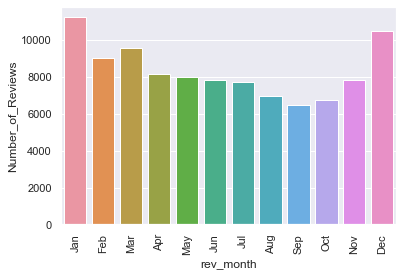

In [46]:
ax = sns.barplot(x = "rev_month", y = "Number_of_Reviews", data = Monthly)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Average overall rating over years:

In [47]:
Yearly_avg_rating = electronics_data.groupby("rev_year")["rating"].mean().reset_index()
Yearly_avg_rating = Yearly_avg_rating.rename(columns = {"rating":"avg_rating"})

In [48]:
Yearly_avg_rating.head(5)

,rev_year,avg_rating
0,1999,4.388889
1,2000,4.321909
2,2001,4.187694
3,2002,4.110151
4,2003,4.014100


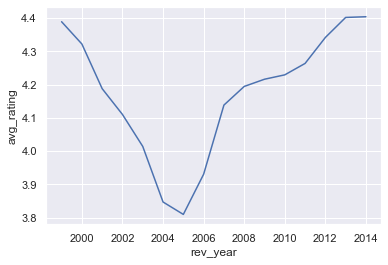

In [49]:
sns.lineplot(x = "rev_year", y = "avg_rating", data = Yearly_avg_rating)
plt.show()

#### Average Rating V/S Average Helpfullness Rating by the User

In [50]:
user_rating_stats = electronics_data[["reviewerID", "helpful_rev", "not_helpful_rev", "rating"]]

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
user_rating_stats['total_rev_given'] = user_rating_stats['helpful_rev'] + user_rating_stats['not_helpful_rev']

user_rating_stats['percentage_helpful'] = (user_rating_stats['helpful_rev']/(user_rating_stats['helpful_rev'] + user_rating_stats['not_helpful_rev']))*100

user_rating_stats['avg_rating_given'] = user_rating_stats.groupby('reviewerID')['rating'].mean()

In [53]:
user_rating_stats.head()

,reviewerID,helpful_rev,not_helpful_rev,rating,total_rev_given,percentage_helpful,avg_rating_given
0,AO94DHGC771SJ,0,0,5.0,0,NaN,NaN
1,AMO214LNFCEI4,12,3,1.0,15,80.000000,NaN
2,A3N7T0DY83Y4IG,43,2,3.0,45,95.555556,NaN
3,A1H8PY3QHMQQA0,9,1,2.0,10,90.000000,NaN
4,A24EV6RXELQZ63,0,0,1.0,0,NaN,NaN


In [54]:
user_rating_stats = user_rating_stats.drop(["helpful_rev", "not_helpful_rev", "rating"], axis = 1)

In [55]:
user_rating_stats.head()

,reviewerID,total_rev_given,percentage_helpful,avg_rating_given
0,AO94DHGC771SJ,0,NaN,NaN
1,AMO214LNFCEI4,15,80.000000,NaN
2,A3N7T0DY83Y4IG,45,95.555556,NaN
3,A1H8PY3QHMQQA0,10,90.000000,NaN
4,A24EV6RXELQZ63,0,NaN,NaN


In [56]:
user_rating_stats["percentage_helpful"].fillna(0, inplace=True)
user_rating_stats["avg_rating_given"].fillna(0, inplace=True)

In [57]:
user_rating_stats["helpful_rev_given"] = electronics_data["helpful_rev"]

In [61]:
user_rating_stats[["reviewerID", "avg_rating_given", "total_rev_given", "helpful_rev_given", "percentage_helpful"]].sample(5)

,reviewerID,avg_rating_given,total_rev_given,helpful_rev_given,percentage_helpful
88347,AFMLU91P4YKUQ,0.0,0,0,0.0
38650,A1N2YDAHTH2U5R,0.0,0,0,0.0
59041,A1PEITQQFYXYLM,0.0,0,0,0.0
6640,A113KNP2LMBXMI,0.0,2,1,50.0
17339,A2F7CSE6KT7NI4,0.0,1,1,100.0


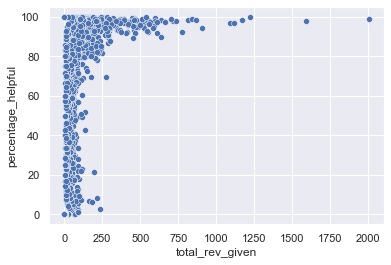

In [63]:
sns.scatterplot(x = "total_rev_given", y = "percentage_helpful", data = user_rating_stats)
plt.show()

#### Length of Review V/S Rating Given

In [64]:
cmp_review_text_rating = electronics_data[["reviewText", "rating_class"]]

In [65]:
cmp_review_text_rating["reviewText_length"] = cmp_review_text_rating["reviewText"].apply(lambda x : len(x))

In [66]:
cmp_review_text_rating.head(5)

,reviewText,rating_class,reviewText_length
0,We got this GPS for my husband who is an (OTR)...,good,805
1,"I'm a professional OTR truck driver, and I bou...",bad,2175
2,"Well, what can I say. I've had this unit in m...",bad,4607
3,"Not going to write a long review, even thought...",bad,2246
4,I've had mine for a year and here's what we go...,bad,1076


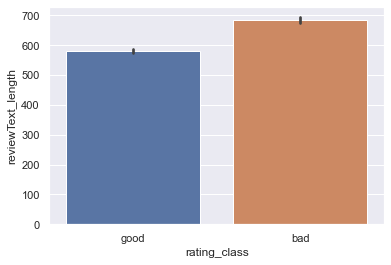

In [67]:
sns.barplot(x = "rating_class", y = "reviewText_length", data = cmp_review_text_rating )
plt.show()

In [68]:
electronics_data.to_csv("electronics_data_2.csv", sep=',', encoding='utf-8', index = False)